# 偏導數(Partial Derivatives)
### 針對某一變數微分，其他變數視為常數。以下對x進行偏微分。
### $\begin{equation}f'(x,y) = \frac{d}{dx}f(x,y) = \lim_{h \to 0} \frac{f(x + h,y) - f(x,y)}{h} \end{equation}$

## 範例
### $f(x,y) = x^2 + y^2$
### 對x進行偏微分。
### $\frac{\partial f(x,y)}{\partial x} = \frac{\partial (x^2 + y^2)}{\partial x}$
### $\frac{\partial x^2}{\partial x} = 2x$
### $\frac{\partial y^2}{\partial x} = 0$
### $\frac{\partial f(x,y)}{\partial x} = 2x + 0 = 2x$
### 對y進行偏微分。
### $\frac{\partial f(x,y)}{\partial y} = 0 + 2y = 2y$

## 計算梯度(gradient)，梯度就是多元函數的斜率

### $f(x,y) = x^2 + y^2$. These partial derivatives are:

### $\frac{\partial f(x,y)}{\partial x} = 2x$
### $\frac{\partial f(x,y)}{\partial y} = 2y$

### $grad(f(x,y)) =  \vec{g(x,y)} = \begin{bmatrix}\frac{\partial f(x,y)}{\partial x} \\ \frac{\partial f(x,y)}{\partial y} \end{bmatrix} = \begin{bmatrix}2x \\ 2y \end{bmatrix} $

## 梯度下降法(Gradient Descent)

In [1]:
# 載入套件
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 目標函數(損失函數):y=x^2
f = lambda x: x ** 2 

# 目標函數的一階導數:dy/dx=2*x
df = lambda x: 2 * x

In [9]:
# 梯度下降函數
# x_start: x的起始點
# df: 目標函數的一階導數
# epochs: 執行週期
# lr: 學習率
def GD(w_start, epochs, lr):    
    w_list = np.zeros(epochs+1)    
    w = w_start    
    w_list[0] = w    
    for i in range(epochs):         
        # w更新 w_new = w — learning_rate * gradient        
        w -= lr * df(w)         
        w_list[i+1] = w    
    return w_list

## 執行梯度下降(Gradient Descent)

w的變化： [5.   2.   0.8  0.32 0.13 0.05 0.02 0.01 0.   0.   0.   0.   0.   0.
 0.   0.  ]


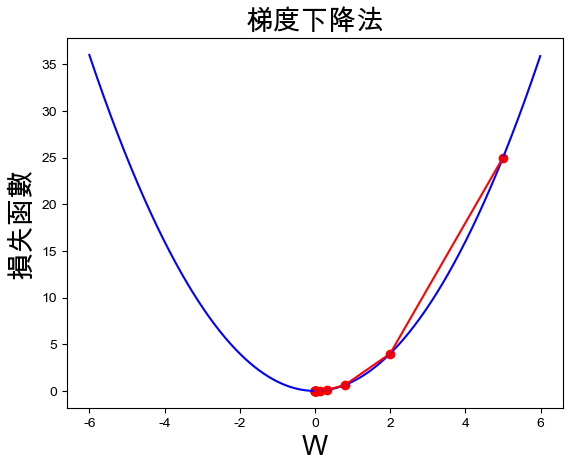

In [13]:
# 超參數(Hyperparameters)
w_start = 5     # 起始權重 -5, -3
epochs = 15     # 執行週期數 
lr = 0.3        # 學習率 0.01, 0.9

# 梯度下降法 
# *** Function 可以直接當參數傳遞 ***
w = GD(w_start, epochs, lr=lr) 
print('w的變化軌跡：', np.around(w, 2))

# 設定中文字型
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']  
# 矯正負號
plt.rcParams['axes.unicode_minus'] = False

color = 'r'    
t = np.arange(-6.0, 6.0, 0.01)
plt.plot(t, f(t), c='b')
plt.plot(w, f(w), c=color, label='lr={}'.format(lr))    
plt.scatter(w, f(w), c=color, ) 

plt.title('梯度下降法', fontsize=20)
plt.xlabel('W', fontsize=20)
plt.ylabel('損失函數', fontsize=20)
plt.show()

## 練習：請調整超參數，觀察梯度下降法的執行結果。

# 其他範例

## 範例1. 
### $x^3-2x+100$

## 範例2. 假定損失函數如下，請使用梯度下降法求取最小值
### $2x^4-3x-20$

## 範例3. 複雜函數
### $sin(x) * e^(-0.1*(x-0.6)^2) $

In [44]:
from sympy import *
import math

x = Symbol('x')
y = sin(x)* E ** (-0.1*(x-0.6)**2)
print(y)
yprime = y.diff(x)

# 目標函數
def f(x_value): return math.sin(x_value) * math.e ** (-0.1*(x_value-0.6)**2)

# 目標函數一階導數:dy/dx
df = lambda x_value: yprime.subs(x, x_value).evalf()

exp(-0.1*(x - 0.6)**2)*sin(x)


w的變化軌跡： [-3.   -3.   -2.99 ... -1.22 -1.22 -1.22]


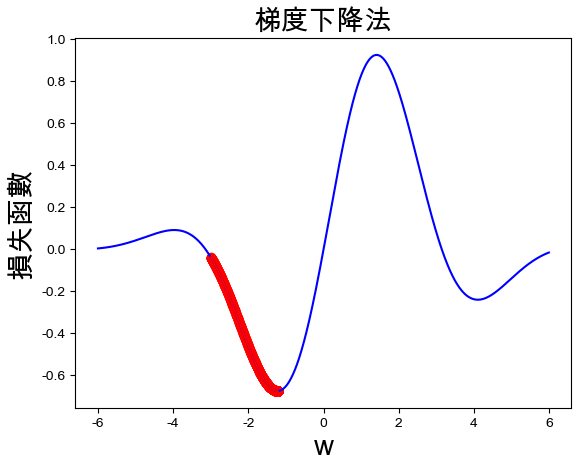

In [49]:
# 超參數(Hyperparameters)
w_start = -3     # 起始權重
epochs = 1500  # 執行週期數 
lr = 0.01      # 學習率 

# 梯度下降法 
# *** Function 可以直接當參數傳遞 ***
w = GD(w_start, epochs, lr=lr) 
print('w的變化軌跡：', np.around(w, 2))

color = 'r'    
t = np.arange(-6.0, 6.0, 0.01)
plt.plot(t, [f(x) for x in t], c='b')
plt.plot(w, [f(x) for x in w], c=color, label='lr={}'.format(lr))    
plt.scatter(w, [f(x) for x in w], c=color, ) 

plt.title('梯度下降法', fontsize=20)
plt.xlabel('w', fontsize=20)
plt.ylabel('損失函數', fontsize=20)
plt.show()